Prediction of Emotion using deep learning

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#read the vector file got from word2vec
df=pd.read_csv("vector.csv")
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sadness,0.333


In [3]:
#unique values in emotion column
df["Emotion"].value_counts()

fear       1243
anger       936
joy         893
sadness     855
Name: Emotion, dtype: int64

In [4]:
#convert the emotion target column into numbers
df["Emotion"]=df["Emotion"].replace({"anger":0,"fear":1,"joy":2,"sadness":3})
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.333


In [5]:
#unique values in emotion column
df["Emotion"].value_counts()

1    1243
0     936
2     893
3     855
Name: Emotion, dtype: int64

Classification for predict Emotion

In [6]:
#split dataset into x and y
x=df.drop(columns=["Emotion","Intensity"])
y=df[["Emotion"]]

In [7]:
#top 5 records of x datset
x.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#top 5 records of y dataset
y.head()

,Emotion
0,0
1,0
2,0
3,0
4,0


In [9]:
#split x and y into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,shuffle=True,stratify=y,random_state=108)

In [10]:
#top 5
x_train

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#top 5
y_train.head()

,Emotion
771,0
529,0
3609,3
2965,2
276,0


In [12]:
#value counts for y_train
y_train["Emotion"].value_counts()

1    1119
0     842
2     804
3     769
Name: Emotion, dtype: int64

In [13]:
#value counts for y_test
y_test["Emotion"].value_counts()

1    124
0     94
2     89
3     86
Name: Emotion, dtype: int64

In [14]:
#convert trarget column into 4 categories
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,4)

In [15]:
#y_train(1--->[1,0,0,0])
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [16]:
#y_test
y_test.head()

,Emotion
3242,3
3480,3
338,0
335,0
454,0


In [17]:
#built architecture
model=Sequential()

#1st dense layer
model.add(Dense(units=64,input_shape=(1000,),activation="relu"))
#2nd dense layer
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
#3rd dense layer
model.add(Dense(16,activation="relu"))

#output layer
model.add(Dense(4,activation="softmax"))

In [18]:
#summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                        

In [19]:
#compile our model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
#early stopping for avoid overfitting
es=EarlyStopping(monitor='accuracy',patience=10)

In [21]:
# Train the model on the data
results = model.fit(x_train,y_train,callbacks=[es],epochs=100)
results

Epoch 1/100
111/111 [==============================] - 2s 3ms/step - loss: 1.3792 - accuracy: 0.3178
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 1.0555 - accuracy: 0.5883
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.7493
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.8452
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8894
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9109
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9236
Epoch 8/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9349
Epoch 9/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.9358
Epoch 10/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1555 - accura

In [22]:
#save model
model.save("ann_classification.h5")

In [23]:
#import metrics for performance calculation
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
#prediction
y_pred=np.round(model.predict(x_test))
y_pred

13/13 [==============================] - 0s 4ms/step


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [25]:
#get prediction class
y_pred=np.argmax(y_pred,axis=1)
y_pred[:5]

array([3, 3, 1, 0, 0], dtype=int64)

In [26]:
#test class
y_test[:5]

,Emotion
3242,3
3480,3
338,0
335,0
454,0


In [27]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[73,  9,  2, 10],
       [15, 99,  1,  9],
       [ 4,  6, 74,  5],
       [13, 17,  3, 53]], dtype=int64)

In [28]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.73        94
           1       0.76      0.80      0.78       124
           2       0.93      0.83      0.88        89
           3       0.69      0.62      0.65        86

    accuracy                           0.76       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.76      0.76      0.76       393



In [29]:
#dataframe for loss and accuracy
df_output=pd.DataFrame(results.history)
df_output.head()

,loss,accuracy
0,1.379238,0.317770
1,1.055507,0.588285
2,0.693282,0.749293
3,0.458058,0.845218
4,0.324652,0.889360


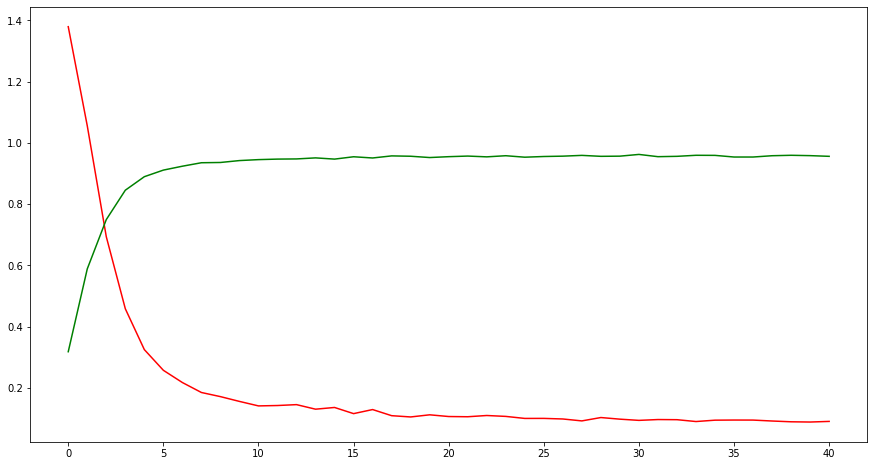

In [30]:
plt.figure(figsize = (15,8))
plt.plot(df_output["loss"],color="red")
plt.plot(df_output["accuracy"],color="green")
plt.show()

prediction of Intensity of Emotion using deep learning

In [31]:
#original dataframe
df

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ,Emotion,Intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.938
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.833
3923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.688
3924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.458
3925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.333


In [32]:
#split dataset into x and y
x=df.drop(columns=["Emotion","Intensity"])
y=df[["Intensity"]]

In [33]:
#top 5
x.head()

,able,absolute,absolutely,accept,accept challenge,account,act,action,actually,add,...,yell,yes,yesterday,yo,young,youtube,youâ,zero,ðÿ,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#top 5
y.head()

,Intensity
0,0.938
1,0.896
2,0.896
3,0.896
4,0.896


In [35]:
#split x and y into train and split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,shuffle=True,random_state=108)

In [36]:
#built architecture
model1=Sequential()

#1st dense layer
model1.add(Dense(units=32,input_shape=(1000,),activation="relu"))
#2nd dense layer
model1.add(Dense(units=16,activation="relu"))
model1.add(Dropout(0.25))
model1.add(BatchNormalization())
#3rd dense layer
model1.add(Dense(8,activation="relu"))

#output layer
model1.add(Dense(1,activation="linear"))

In [37]:
#summarize the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                32032     
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [38]:
#compile our model
model1.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [39]:
#early stopping for avoid overfitting
es=EarlyStopping(monitor='mae',patience=10)

In [40]:
# Train the model on the data
results = model1.fit(x_train,y_train,callbacks=[es],epochs=100)
results

Epoch 1/100
111/111 [==============================] - 2s 4ms/step - loss: 0.4673 - mae: 0.5320
Epoch 2/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0598 - mae: 0.1962
Epoch 3/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0362 - mae: 0.1548
Epoch 4/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0355 - mae: 0.1530
Epoch 5/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0353 - mae: 0.1525
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0352 - mae: 0.1523
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0352 - mae: 0.1526
Epoch 8/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0354 - mae: 0.1526
Epoch 9/100
111/111 [==============================] - 0s 4ms/step - loss: 0.0350 - mae: 0.1519
Epoch 10/100
111/111 [==============================] - 0s 3ms/step - loss: 0.0350 - mae: 0.1514
Epoch 11/100
111/111 [=================

In [41]:
#save model
model1.save("ann_regression.h5")

In [42]:
#dataframe for loss and accuracy
df_output=pd.DataFrame(results.history)
df_output.head()

,loss,mae
0,0.467339,0.531989
1,0.059763,0.196159
2,0.036225,0.154823
3,0.035501,0.153026
4,0.035292,0.152506


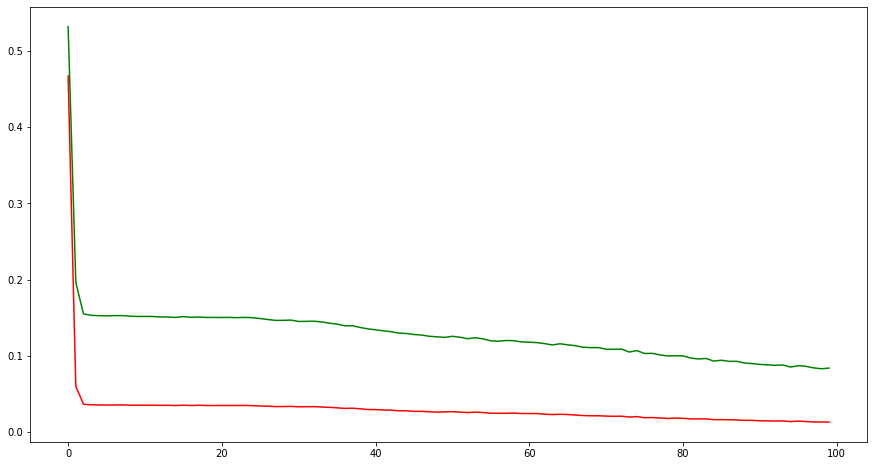

In [43]:
#loss vs MAE
plt.figure(figsize = (15,8))
plt.plot(df_output["loss"],color="red")
plt.plot(df_output["mae"],color="green")
plt.show()

In [44]:
#prediction
y_pred=model1.predict(x_test)
y_pred[:5]

13/13 [==============================] - 0s 3ms/step


array([[0.6828624 ],
       [0.3677094 ],
       [0.46546137],
       [0.4137407 ],
       [0.5249292 ]], dtype=float32)

In [45]:
#y_test
y_test.head()

,Intensity
3187,0.708
3301,0.604
1931,0.271
1865,0.312
3677,0.333


In [46]:
#import metrics for performance calculation
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
r2_score(y_test,y_pred)

0.05333190407330213

In [48]:
mean_squared_error(y_test,y_pred,squared=False)

0.17857047314812916